<a href="https://www.kaggle.com/code/jimschacko/bangalore-aqi-prediction?scriptVersionId=134536081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df= pd.read_csv("/kaggle/input/bangalore-5-year-aqi-data/AQI Data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df.dropna()

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
5,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
9,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
df.nunique()

T         243
TM        239
Tm        223
SLP       253
H          76
VV         22
V          94
VM         27
PM 2.5    557
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1 to 2191
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1095 non-null   float64
 1   TM      1095 non-null   float64
 2   Tm      1095 non-null   float64
 3   SLP     1095 non-null   float64
 4   H       1095 non-null   float64
 5   VV      1095 non-null   float64
 6   V       1095 non-null   float64
 7   VM      1095 non-null   float64
 8   PM 2.5  1095 non-null   float64
dtypes: float64(9)
memory usage: 85.5 KB


In [8]:
df.describe()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,25.996256,32.468767,19.440639,1008.099087,62.912329,2.003927,6.756347,15.820457,109.295209
std,7.236406,6.678874,7.445750,7.532948,15.677088,0.747496,3.837615,7.303617,84.439934
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.200000,27.800000,12.050000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.916667
50%,28.200000,34.200000,21.100000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,19.450000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


<Axes: xlabel='PM 2.5', ylabel='Density'>

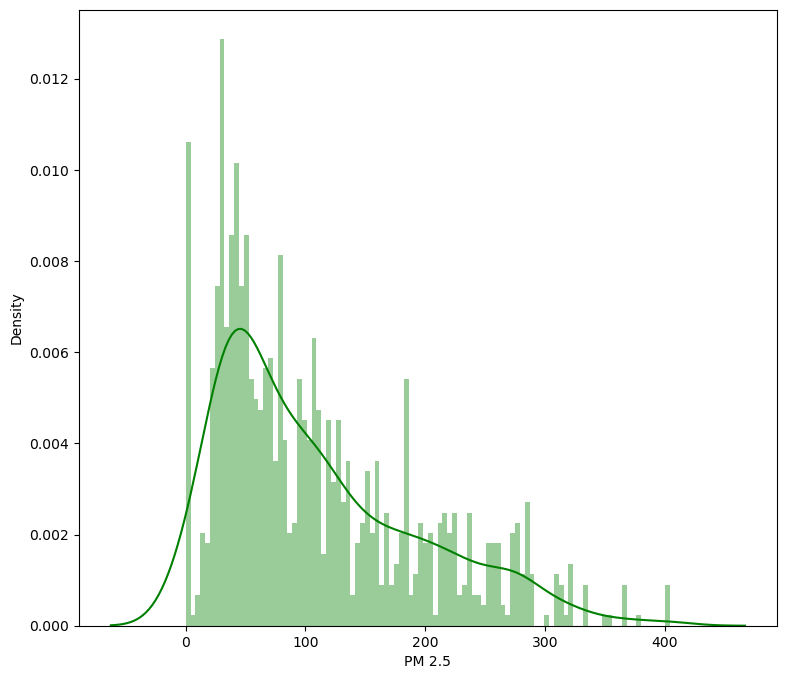

In [9]:
plt.figure(figsize=(9, 8))
sns.distplot(df['PM 2.5'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [10]:
col= df.columns
col

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

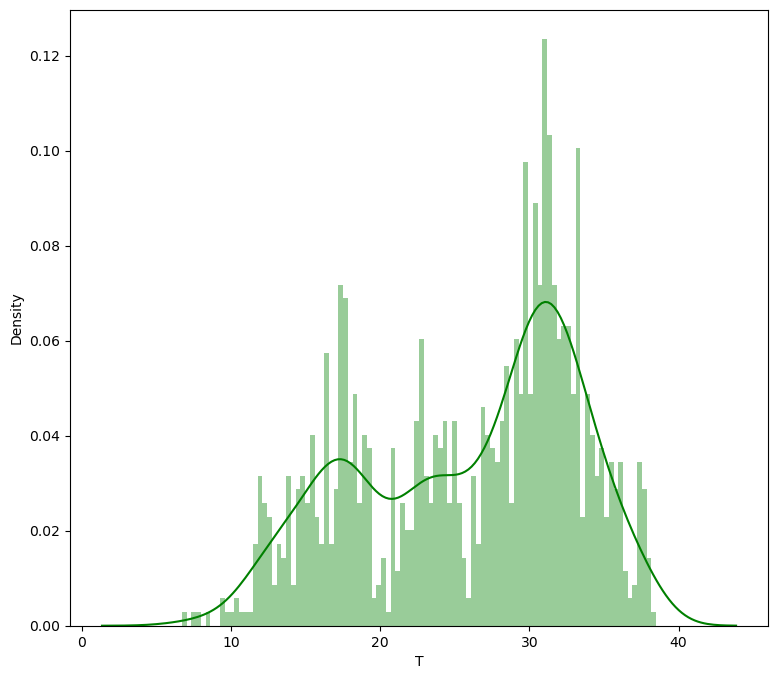

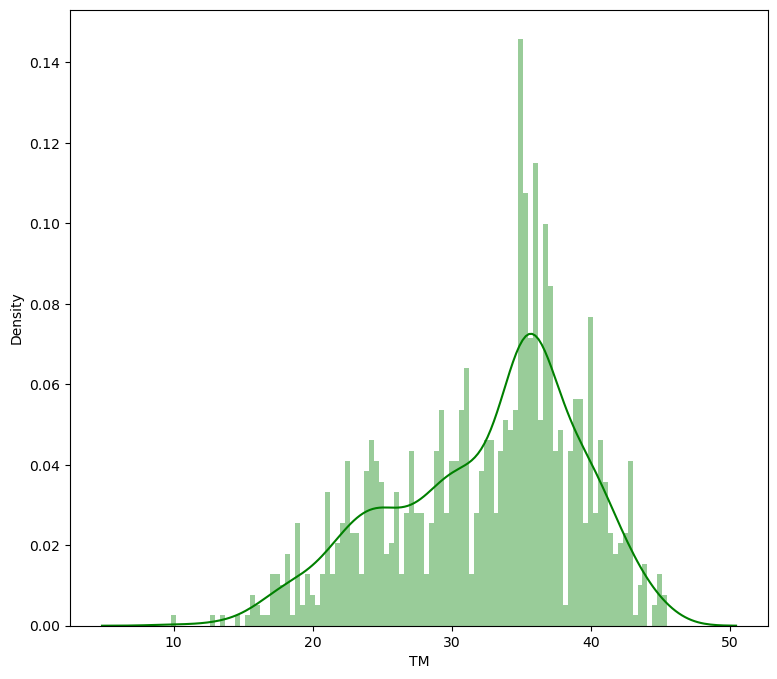

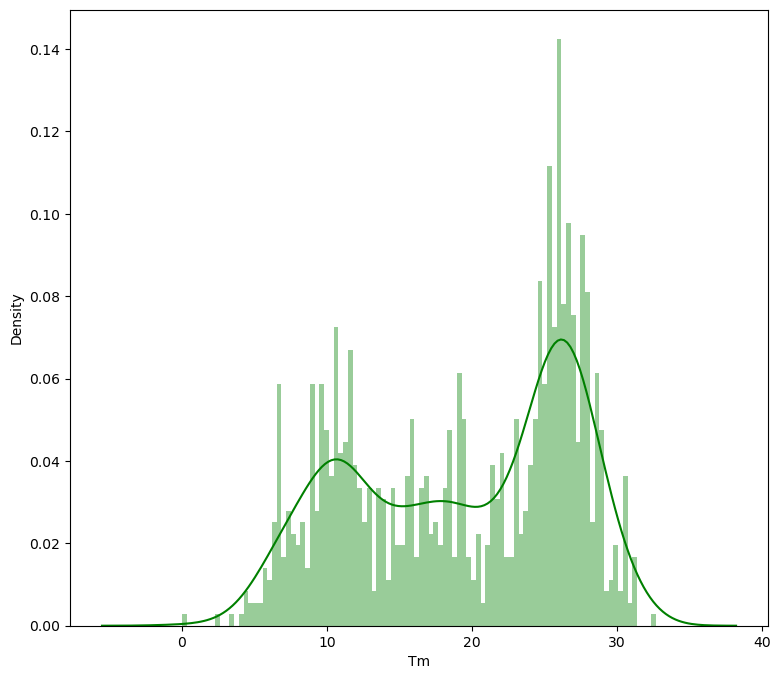

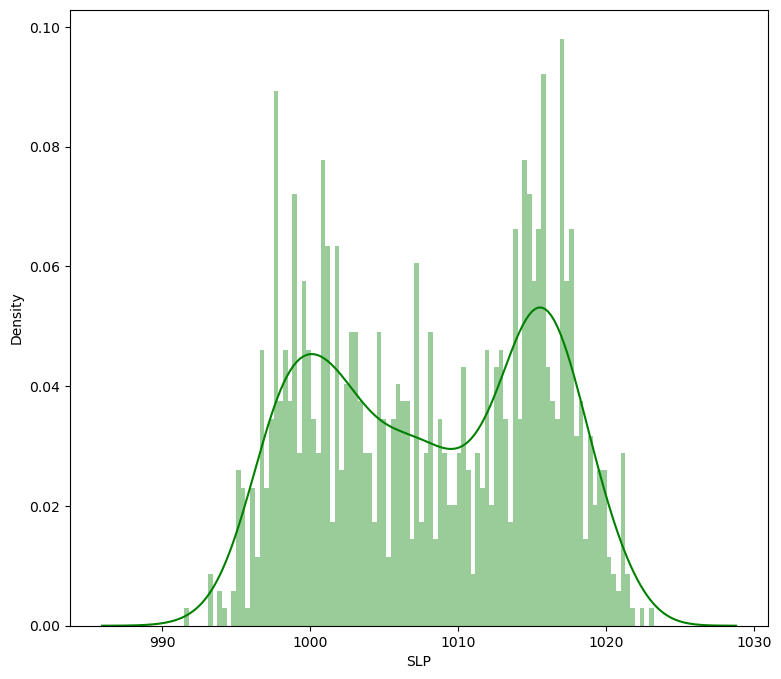

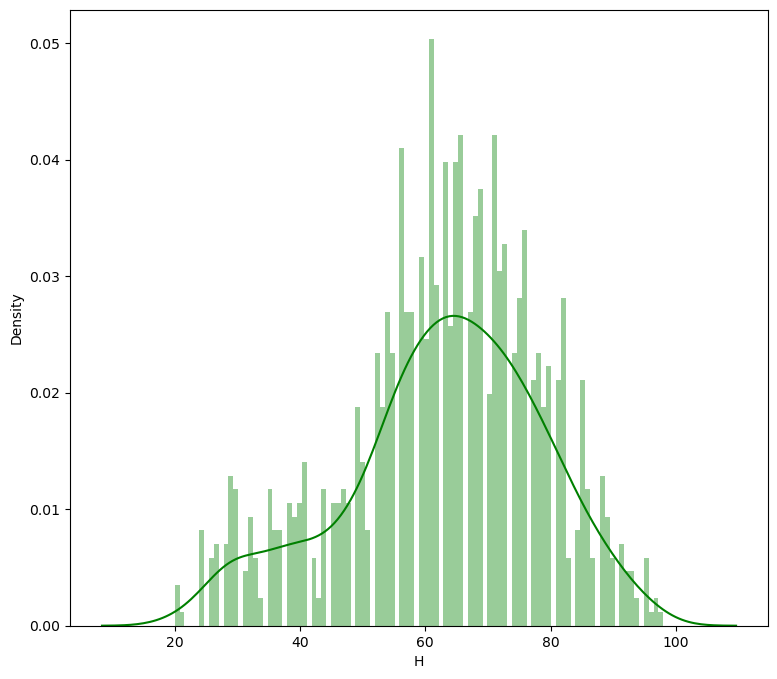

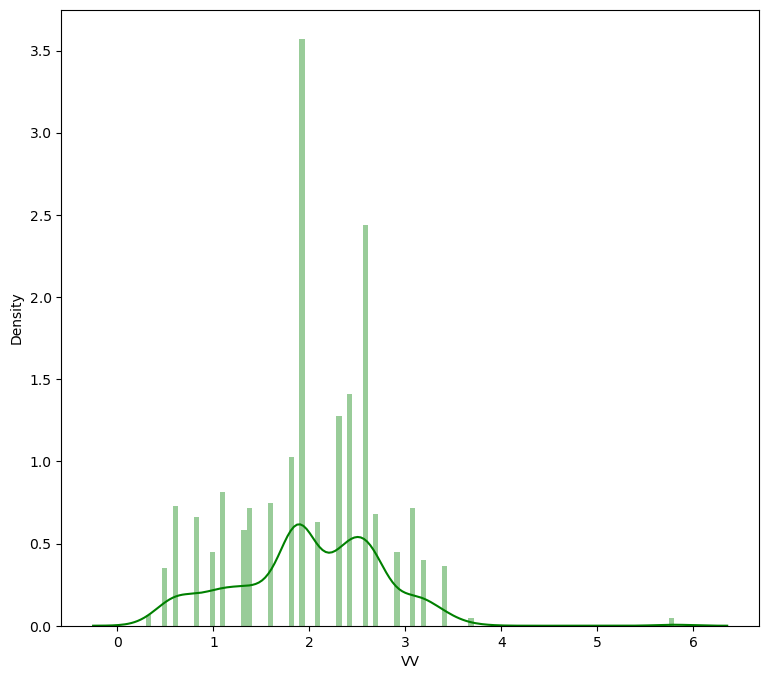

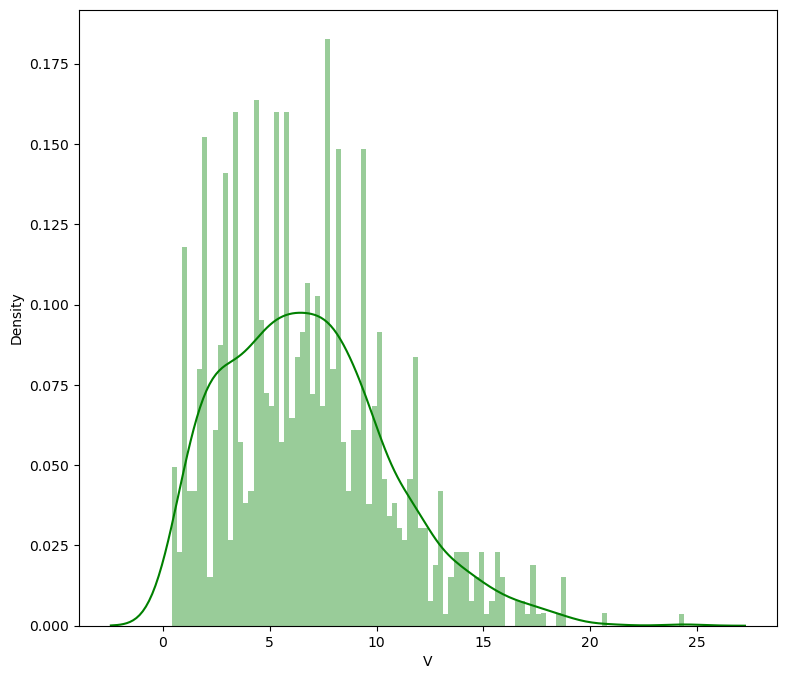

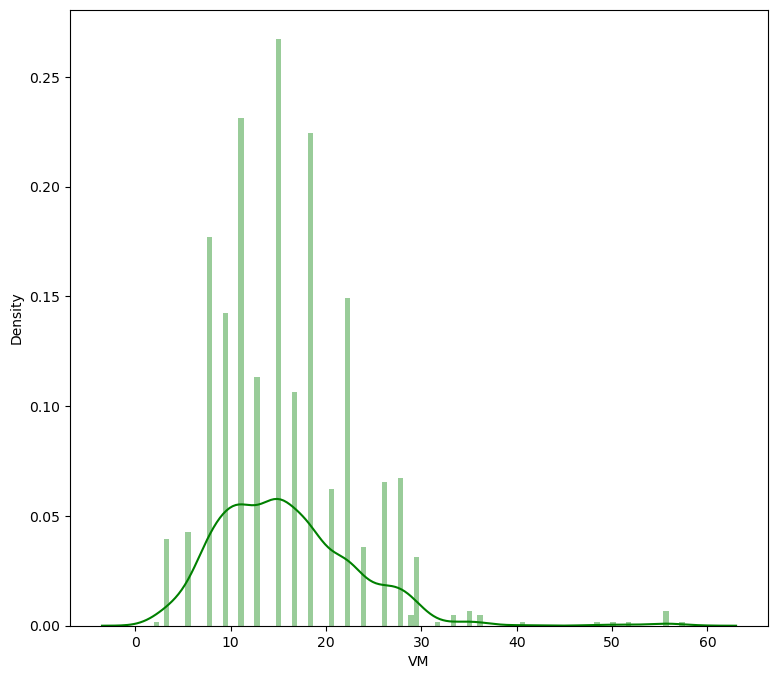

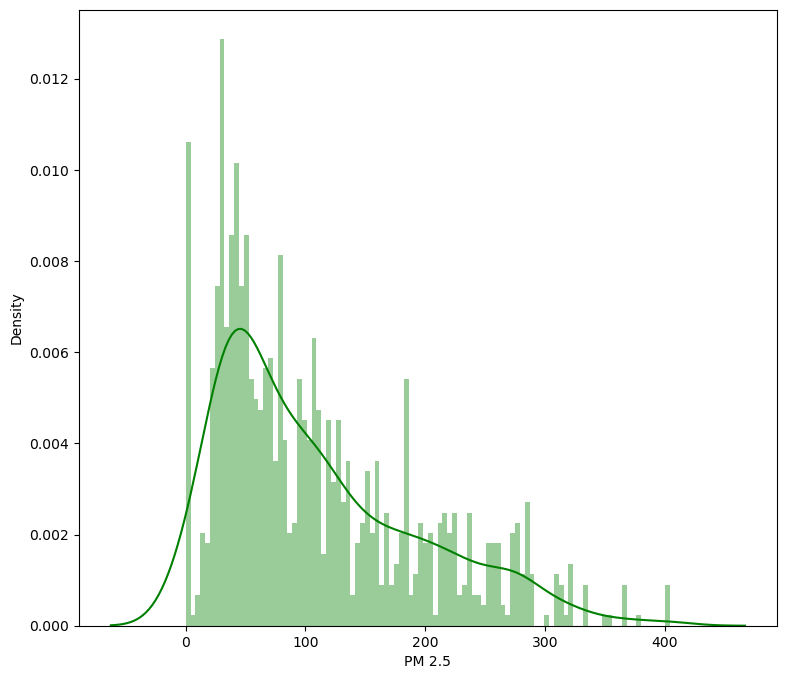

In [11]:
for i in col:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})

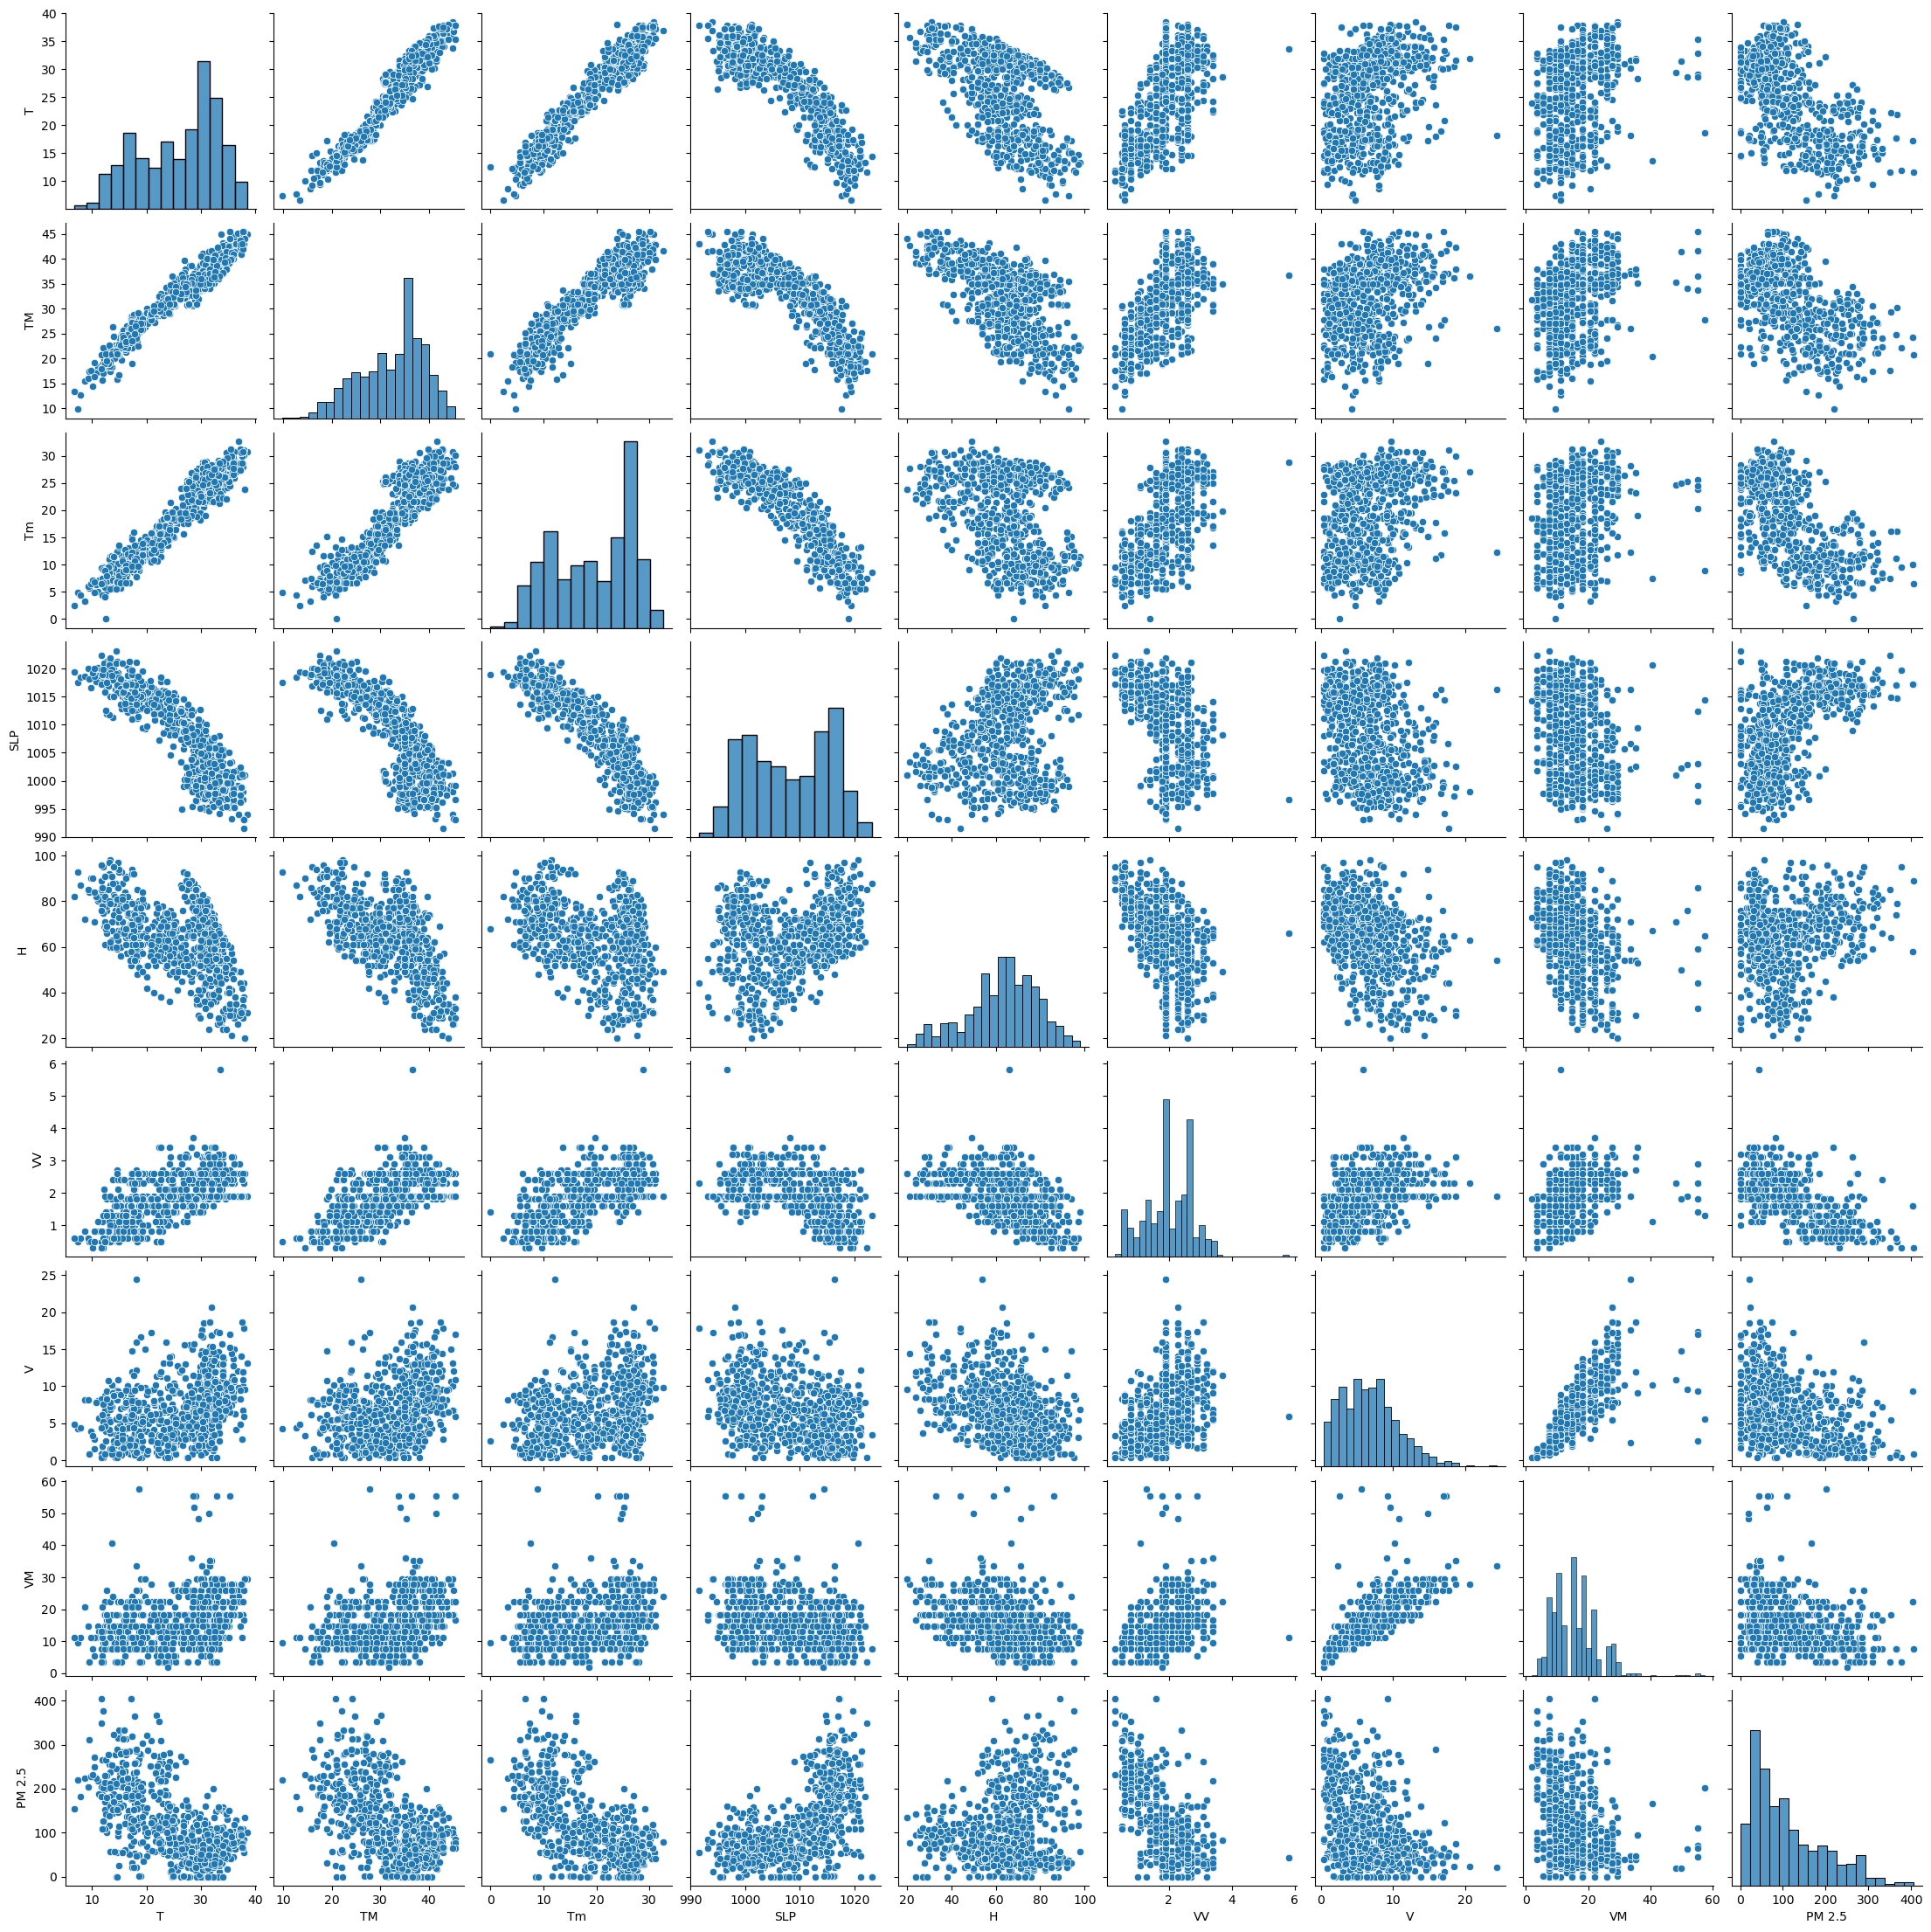

In [12]:
sns.pairplot(df)

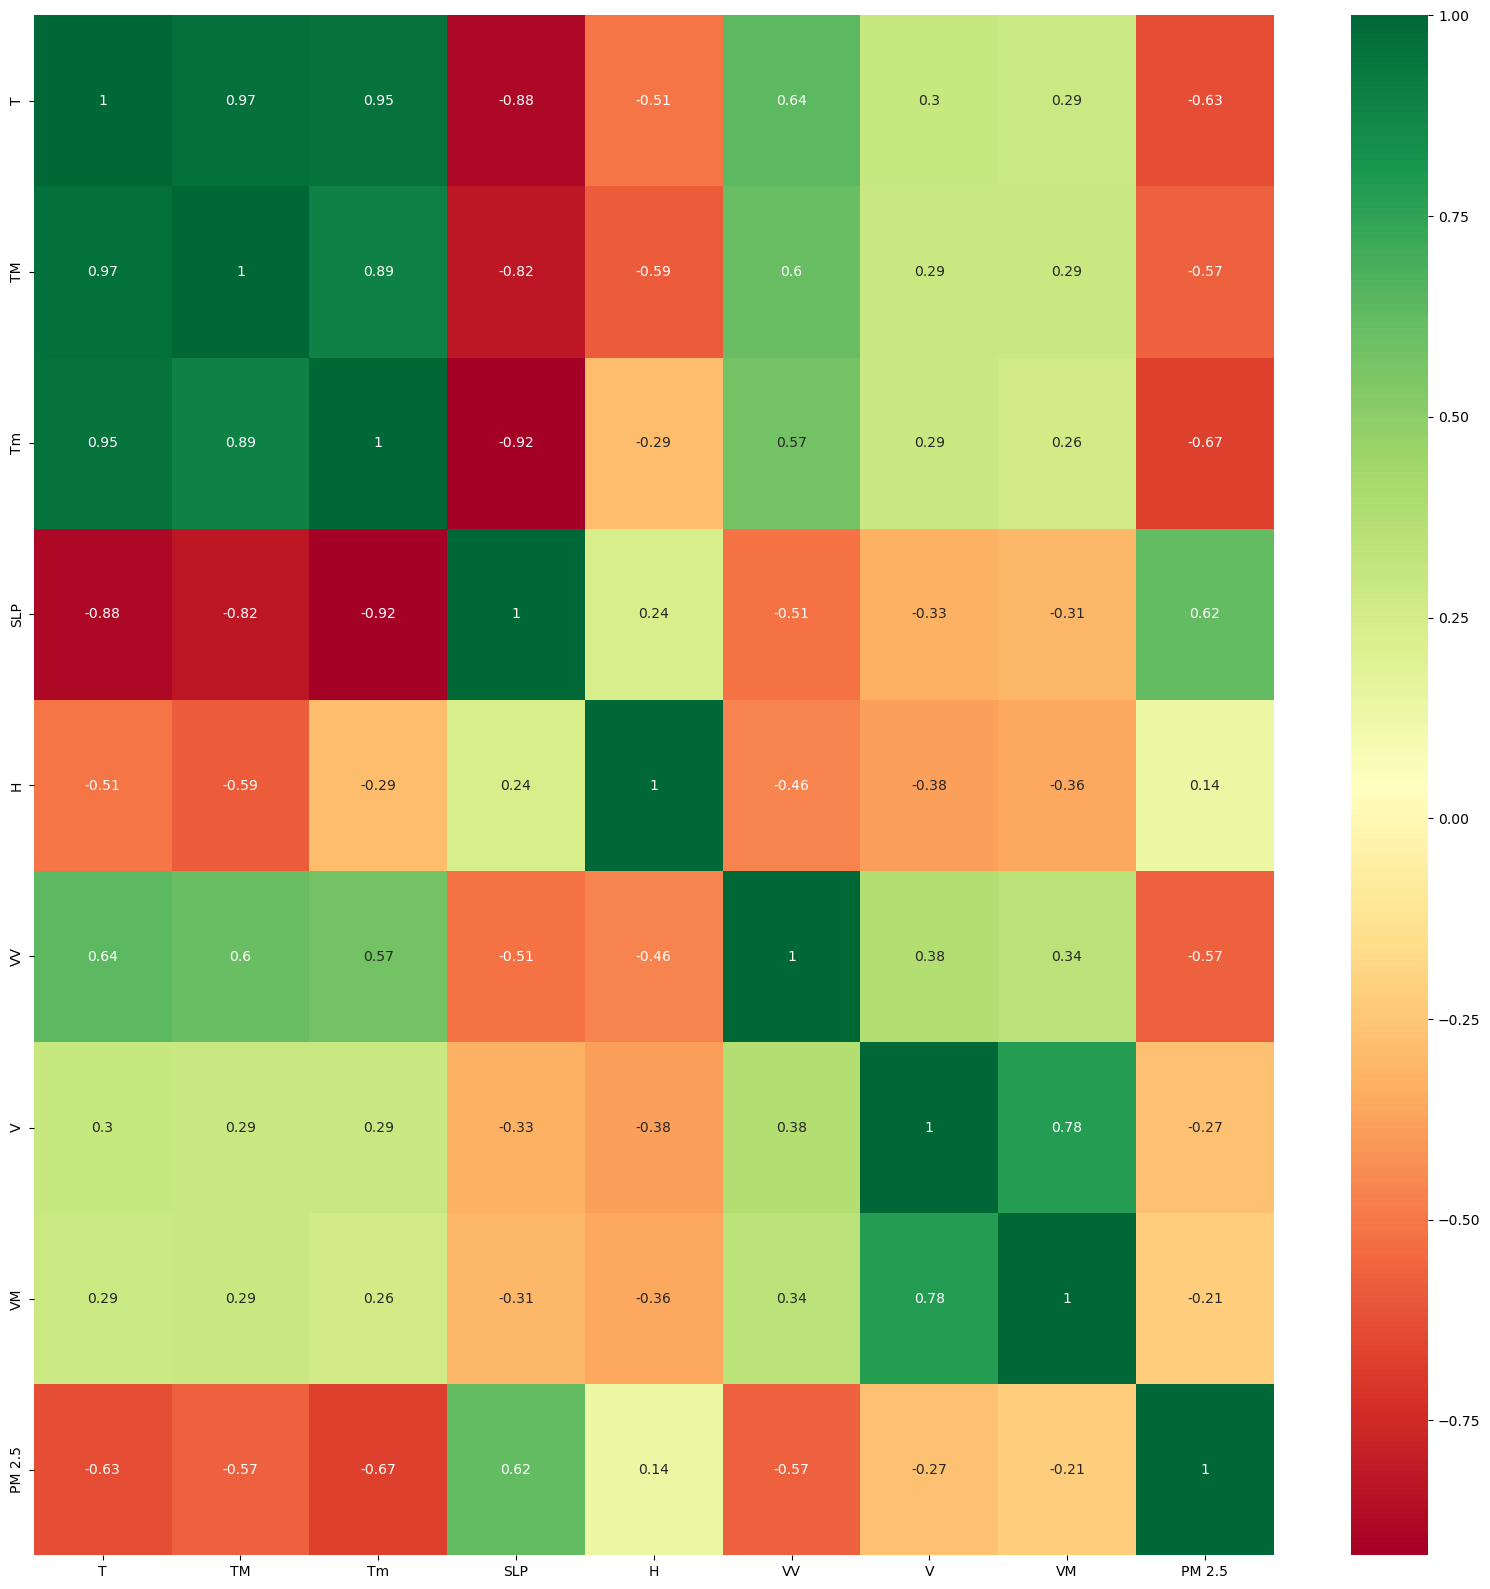

In [13]:
relation= df.corr()
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

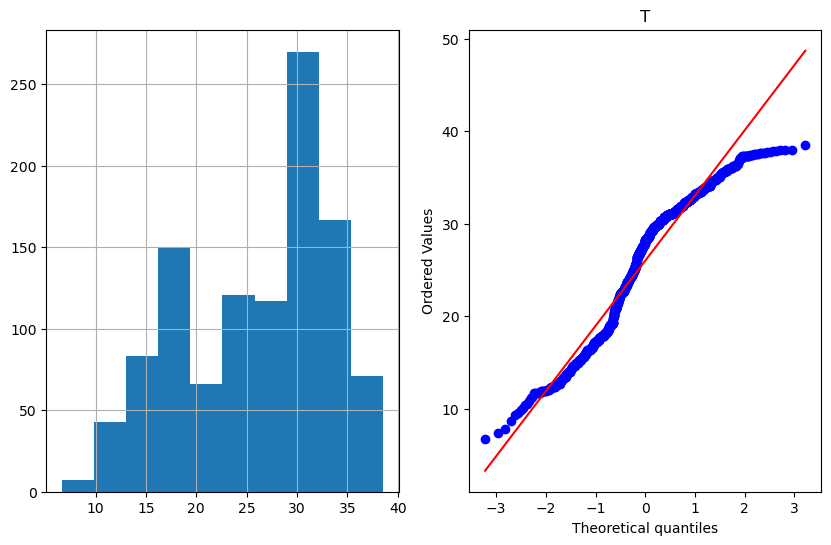

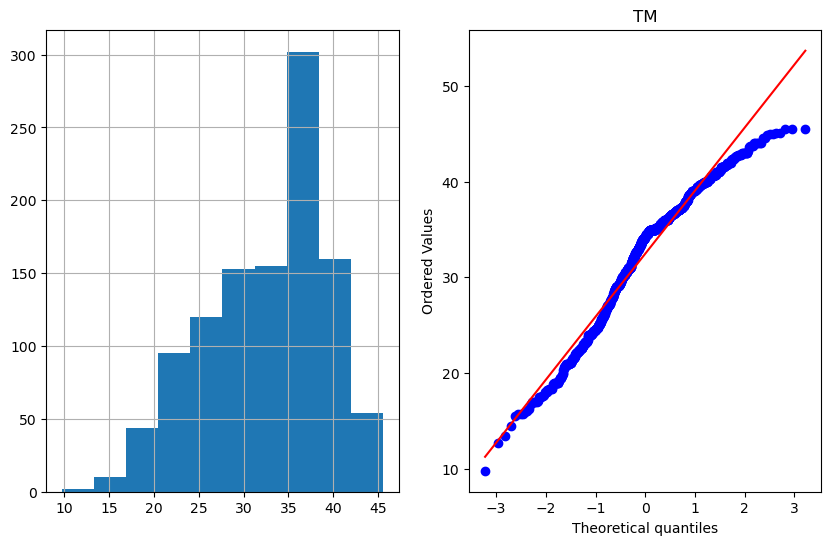

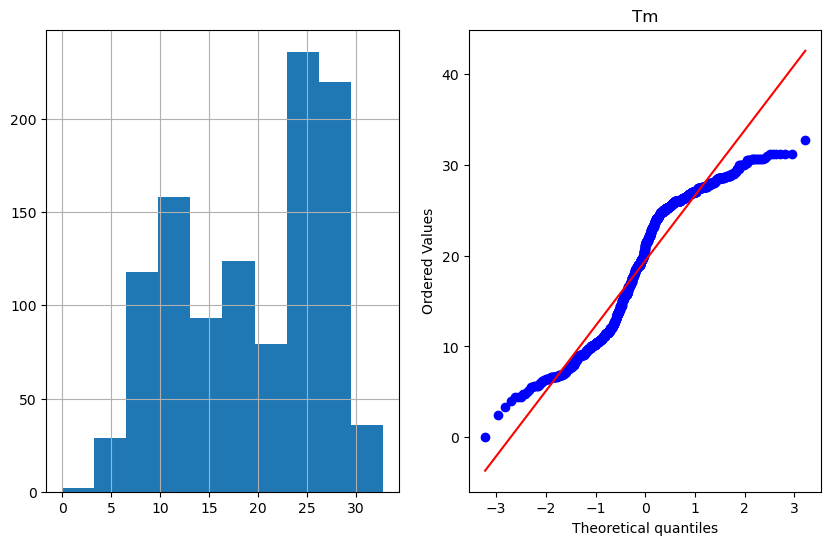

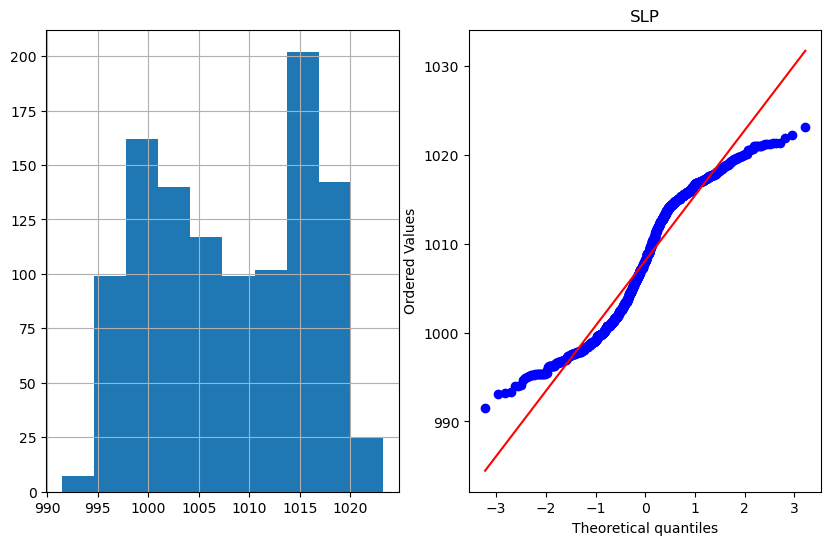

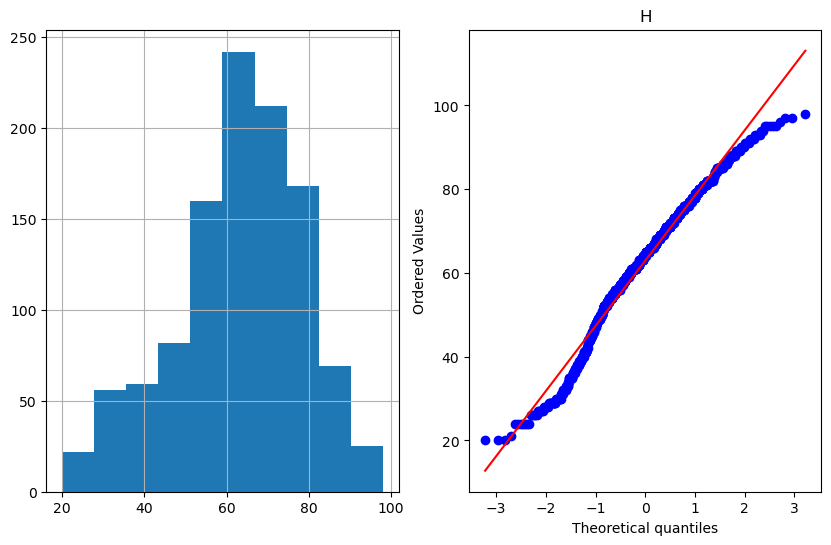

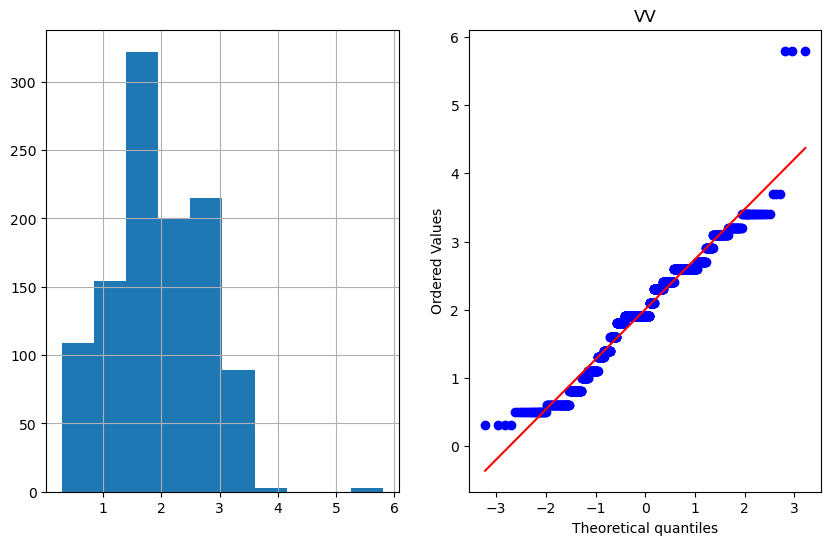

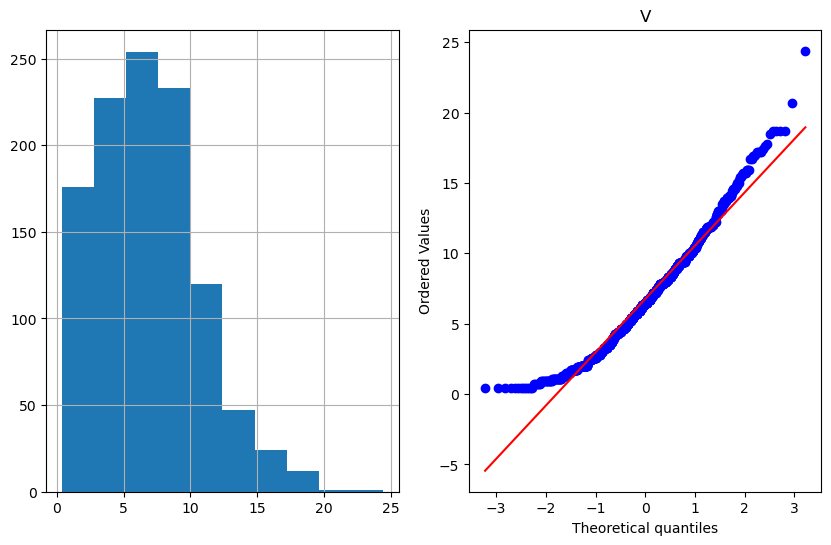

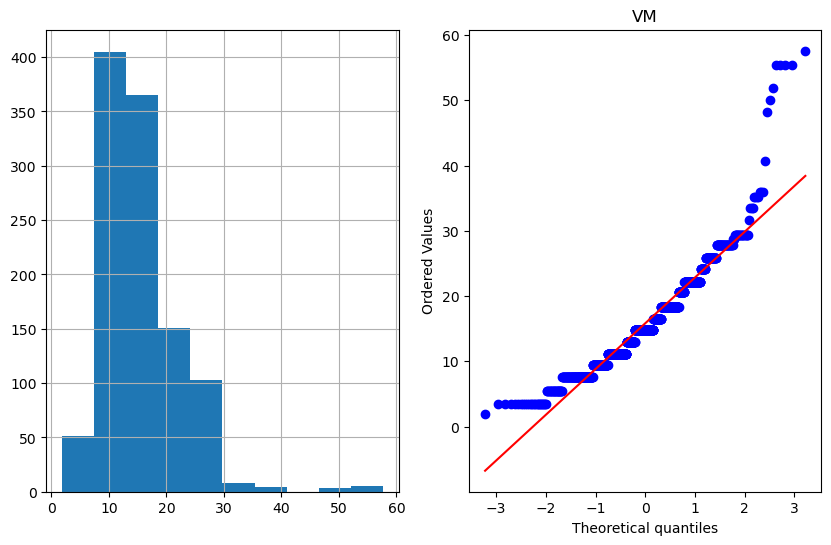

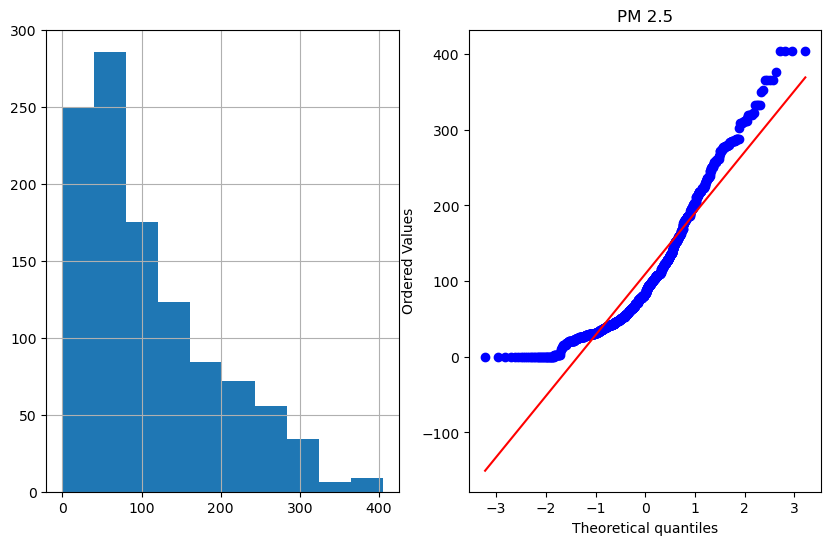

In [14]:
import scipy.stats as stat
import pylab
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()
for i in col:
    plot_curve(df,i)

In [15]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features
x.head()

,T,TM,Tm,SLP,H,VV,V,VM
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
5,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
9,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [16]:
y.head()

1    219.720833
3    182.187500
5    154.037500
7    223.208333
9    200.645833
Name: PM 2.5, dtype: float64

In [17]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.16683992 0.1104903  0.22459132 0.11806819 0.08831718 0.19545588
 0.05423459 0.04200262]


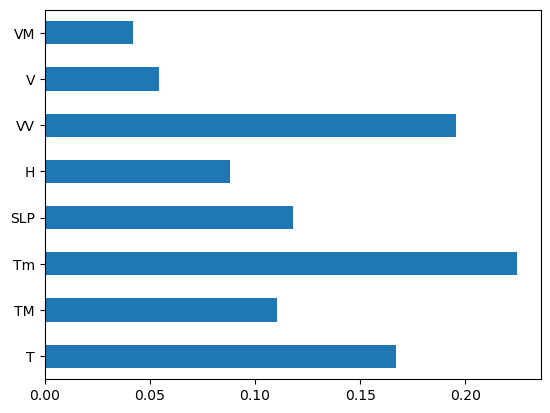

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.coef_
regressor.intercept_
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5339657117775242
Coefficient of determination R^2 <-- on train set: 0.530454613274106


In [22]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)
score.mean()

0.4706953011159964

In [23]:
prediction=regressor.predict(X_test)


<Axes: xlabel='PM 2.5', ylabel='Density'>

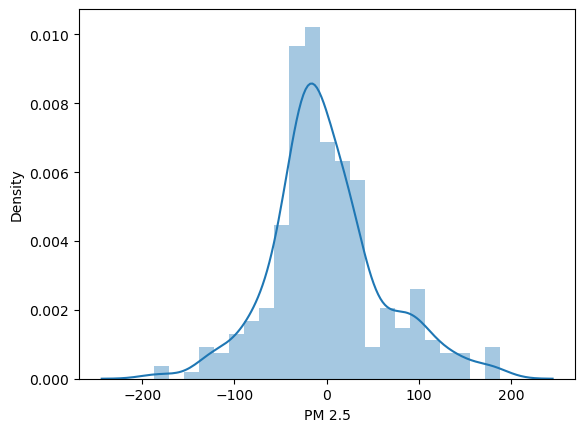

In [24]:
sns.distplot(y_test-prediction)


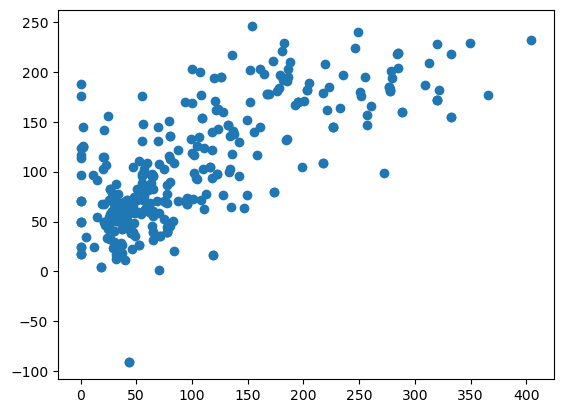

In [25]:
plt.scatter(y_test,prediction)


In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.74087005930338
MSE: 3616.10077097473
RMSE: 60.134023405845134


In [27]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

r2_score is 0.530454613274106


In [28]:
from xgboost import XGBRegressor
xg= XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV

# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


In [29]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [30]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
xgb_random.fit(X_train,y_train)
xgb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.9s
[CV] END learning_ra

{'subsample': 0.8,
 'n_estimators': 900,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [32]:
xgr = XGBRegressor(subsample= 0.8,
 n_estimators= 900,
 min_child_weight= 3,
 max_depth= 30,
 learning_rate= 0.05)
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
predictions=xgr.predict(X_test)


<Axes: xlabel='PM 2.5', ylabel='Density'>

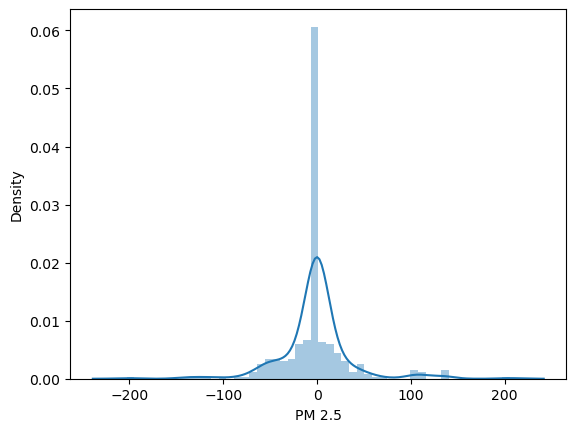

In [34]:
sns.distplot(y_test-predictions)


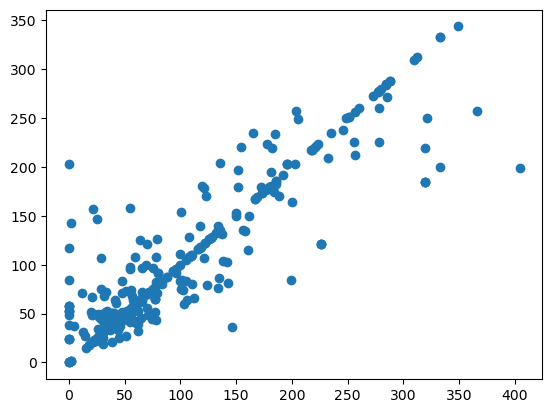

In [35]:
plt.scatter(y_test,predictions)


In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.686817780105876
MSE: 1462.43236909609
RMSE: 38.24176210762378


In [37]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

r2_score is 0.8101052996588387


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [39]:
from sklearn.model_selection import RandomizedSearchCV


In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [44]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

In [45]:
rf1.fit(X_train,y_train)


RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

In [46]:
ypred= rf1.predict(X_test)


<Axes: xlabel='PM 2.5', ylabel='Density'>

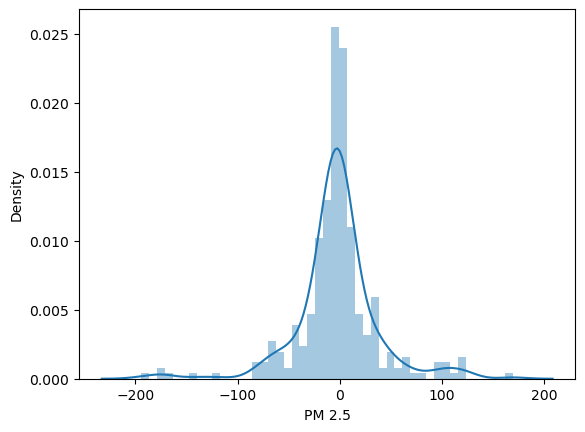

In [47]:
sns.distplot(y_test-ypred)


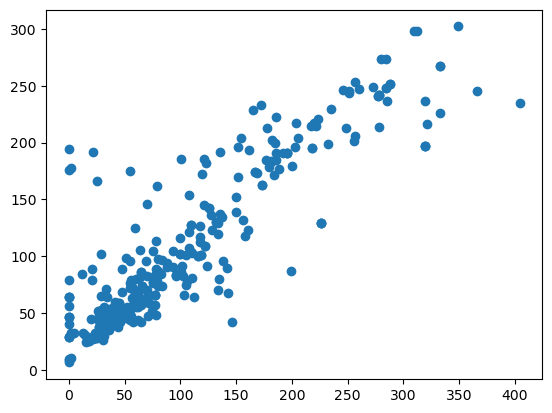

In [48]:
plt.scatter(y_test,ypred)


In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 24.848404796669154
MSE: 1677.128556309993
RMSE: 40.95276005729031


In [50]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, ypred))

r2_score is 0.7822273143263797


In [51]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.12.0


In [52]:
from tpot import TPOTRegressor

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((766, 8), (329, 8), (766,), (329,))

In [55]:
from sklearn.model_selection import RepeatedKFold


In [56]:
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [57]:
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [58]:
# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20.528707092034765

Generation 2 - Current best internal CV score: -20.528707092034765

Generation 3 - Current best internal CV score: -19.81690144421225

Generation 4 - Current best internal CV score: -19.81690144421225

Generation 5 - Current best internal CV score: -19.46416484336818

Best pipeline: KNeighborsRegressor(LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False), n_neighbors=97, p=1, weights=distance)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=5, n_jobs=-1, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [59]:
print(model.score(X_test, y_test))


-20.53858032252848


In [60]:
model.fitted_pipeline_


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('stackingestimator',
                 StackingEstimator(estimator=LassoLarsCV(normalize=False))),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=97, p=1, weights='distance'))])

In [61]:
pred= model.predict(X_test)


<Axes: xlabel='PM 2.5', ylabel='Density'>

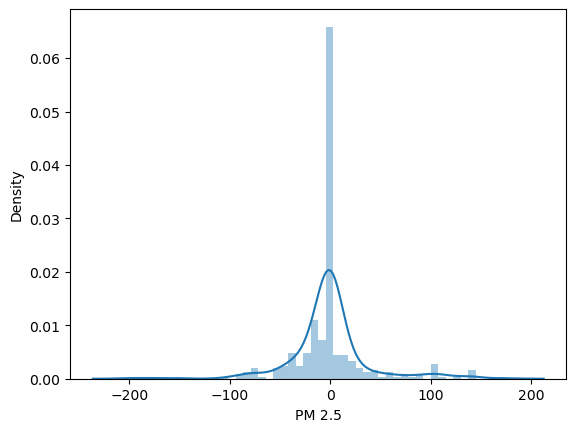

In [62]:
sns.distplot(y_test-pred)


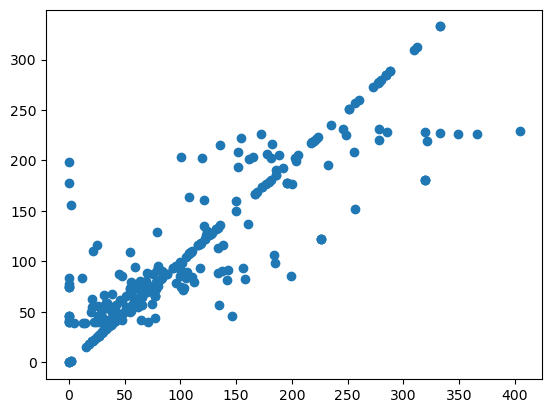

In [63]:
plt.scatter(y_test,pred)


In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 20.53858032252848
MSE: 1589.823464744342
RMSE: 39.87259039420867


In [65]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, pred))

r2_score is 0.7935637525449648
